In [104]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import random

%matplotlib inline

In [129]:
import numpy as np
import random

def decoded_x_y(chromosome):
    """
    Decode the chromosome of 0s and 1s to obtain the x and y values.
    Args:
        chromosome (list): Chromosome of 0s and 1s.
    Returns:
        tuple: Decoded x and y values.
    """
    lb_x = lower_limits[0]  # Lower bound for chromosome x
    ub_x = upper_limits[0]  # Upper bound for chromosome x
    len_x = len(chromosome) // 2  # Length of chromosome x
    lb_y = lower_limits[1]  # Lower bound for chromosome y
    ub_y = upper_limits[1]  # Upper bound for chromosome y
    len_y = len(chromosome) // 2  # Length of chromosome y

    precision_x = (ub_x - lb_x) / ((2 ** len_x) - 1)  # Precision for decoding x
    precision_y = (ub_y - lb_y) / ((2 ** len_y) - 1)  # Precision for decoding y

    z = 0  # Start at 2^0 in the formula
    t = 1  # Start at the last element of the vector [index - 1]
    x_bit_sum = 0  # Sum of (bit * 2^i) is 0 at first
    for i in range(len(chromosome) // 2):
        x_bit = chromosome[-t] * (2 ** z)
        x_bit_sum += x_bit
        t += 1
        z += 1

    z = 0  # Start at 2^0 in the formula
    t = 1 + (len(chromosome) // 2)  # First 2 are y, so index will be 1 + 2 = -3
    y_bit_sum = 0  # Sum of (bit * 2^i) is 0 at first
    for j in range(len(chromosome) // 2):
        y_bit = chromosome[-t] * (2 ** z)
        y_bit_sum += y_bit
        t += 1
        z += 1

    decoded_x = (x_bit_sum * precision_x) + lb_x
    decoded_y = (y_bit_sum * precision_y) + lb_y

    return decoded_x, decoded_y

def fitness_calculation(chromosome):
    """
    Calculate the fitness of the chromosome.
    Args:
        chromosome (list): Chromosome of 0s and 1s.
    Returns:
        float: Fitness value.
    """
    return function(decoded_x_y(chromosome))

def create_chromosome(length=14):
    """
    Create a random chromosome with the given length (must be an even number).
    Args:
        length (int): Length of the chromosome.
    Returns:
        list: Randomly generated chromosome.
    """
    if length % 2 != 0:
        raise TypeError('The length of the chromosomes must be an even number!')
    chromosome = np.random.randint(2, size=length)
    return chromosome

def generate_population(N, length):
    """
    Generate a population of random chromosomes.
    Args:
        N (int): Number of chromosomes in the population.
        length (int): Length of each chromosome.
    Returns:
        list: List of randomly generated chromosomes.
    """
    population = []
    for _ in range(N):
        population.append(create_chromosome(length))
    return population

def best_chromosome_of_all(population):
    """
    Find the best chromosome in the population based on fitness value.
    Args:
        population (list): List of chromosomes.
    Returns:
        list: Best chromosome.
    """
    best_position = population[0]
    for chromosome in population:
        if fitness_calculation(chromosome) < fitness_calculation(best_position):
            best_position = chromosome
    return best_position

def selection(population, selection_method="tournament"):
    """
    Select two parents from the population for the crossover stage.
    Args:
        population (list): List of chromosomes.
        selection_method (str): Selection method ("tournament" or "roulette").
    Returns:
        list: Selected parents.
    """
    if selection_method == "tournament":
        selected_parents = []
        K = 5  # Number of contestants

        if K >= len(population):
            raise TypeError('The population size must be greater than the number of contestants (K)!')

        for _ in range(2):  # Select two chromosomes
            pre_selected = []
            fitness_preselected = []
            while len(pre_selected) < K:  # K pre-selected chromosomes
                chromo = random.choice(population)
                fitness_chromo = fitness_calculation(chromo)
                if fitness_chromo not in fitness_preselected:
                    fitness_preselected.append(fitness_chromo)
                    pre_selected.append(chromo)
            best_pre = best_chromosome_of_all(pre_selected)  # Choose the best of pre-selected chromosomes
            selected_parents.append(best_pre)
        return selected_parents

    if selection_method == "roulette":
        print("roulette")

def crossover(parents, crossover_method="2-point", prob_cross=0.1):
    """
    Perform crossover between two parents to produce two children.
    Args:
        parents (list): List of two parent chromosomes.
        crossover_method (str): Crossover method ("2-point" or "single-point").
        prob_cross (float): Probability of crossover.
    Returns:
        list: List of two children chromosomes.
    """
    if np.random.rand() < prob_cross:
        return parents
    chromo1 = parents[0]
    chromo2 = parents[1]
    children1 = np.copy(chromo1)
    children2 = np.copy(chromo2)
    chromosome_length = len(parents[0])

    if crossover_method == "2-point":
        # Choose two random numbers
        random_index = []
        while len(random_index) < 2:
            number = np.random.randint(chromosome_length)
            if number not in random_index:
                random_index.append(number)
        random_index = sorted(random_index)

        # Exchange genetic material
        for i in range(chromosome_length):
            if random_index[0] <= i < random_index[1]:
                children1[i] = chromo2[i]
                children2[i] = chromo1[i]

        children = [children1, children2]
        return children

    if crossover_method == "single-point":
        print("single-point")
"""
def mutation(chromosome, prob_mut):
    
    Perform mutation on the given chromosome.
    Args:
        chromosome (list): Chromosome of 0s and 1s.
        prob_mut (float): Probability of mutation.
    Returns:
        list: Mutated chromosome.
    
    chromosome_mutated = np.copy(chromosome)
    for i in range(len(chromosome)):
        random_number = np.random.rand()
        if random_number < prob_mut:
            if chromosome_mutated[i] == 0:
                chromosome_mutated[i] = 1
            else:
                chromosome_mutated[i] = 0
    return chromosome_mutated
"""
def mutation(chromosome, prob_mut):
    """
    Perform mutation on the given chromosome.
    Args:
        chromosome (list): Chromosome of 0s and 1s.
        prob_mut (float): Probability of mutation.
    Returns:
        list: Mutated chromosome.
    """
    chromosome_mutated = np.copy(chromosome)
    i = random.randint(0, len(chromosome)-1)
    random_number = np.random.rand()
    if random_number < prob_mut:
        if chromosome_mutated[i] == 0:
            chromosome_mutated[i] = 1
        else:
            chromosome_mutated[i] = 0
    return chromosome_mutated



def get_best_value_position(data):
    """
    Find the best fitness value and corresponding position in the list.
    Args:
        data (list): List of dictionaries containing 'best_value' and 'position' keys.
    Returns:
        float: Best fitness value.
        tuple: Best position.
    """
    best_fitness = float('inf')
    best_position = None

    for item in data:
        if item['best_value'] < best_fitness:
            best_fitness = item['best_value']
            best_position = item['position']

    return best_fitness, best_position

def genetic_algorithm(max_iterations, num_particles, length, prob_cross, prob_mut, selection_method, crossover_method):
    """
    Perform the genetic algorithm.
    Args:
        max_iterations (int): Number of generations.
        num_particles (int): Population size.
        length (int): Length of the chromosomes.
        prob_cross (float): Probability of crossover.
        prob_mut (float): Probability of mutation.
        selection_method (str): Selection method ("tournament" or "roulette").
        crossover_method (str): Crossover method ("2-point" or "single-point").
    Returns:
        tuple: Best position, best fitness, and history of positions.
    """
    best_values = []
    first_population = generate_population(num_particles, length)
    historial_pos_total = []

    for generation in range(1, max_iterations + 1):
        new_population = []
        new_population.append(best_chromosome_of_all(first_population))
        while len(new_population) < len(first_population):
            # Selection stage
            parents = selection(first_population, selection_method=selection_method)
            # Crossover stage
            new_children = crossover(parents, crossover_method=crossover_method, prob_cross=prob_cross)
            # Mutation stage
            for child in new_children:
                mutated_child = mutation(child, prob_mut)
                if len(new_population) < len(first_population):
                    new_population.append(mutated_child)

        first_population = new_population
        best_chromo = best_chromosome_of_all(first_population)
        best_values.append({'position': decoded_x_y(best_chromo), 'best_value': fitness_calculation(best_chromo)})
        historial_pos_total_decoded = list(map(decoded_x_y, first_population))
        historial_pos_total.append(historial_pos_total_decoded)

    best_fitness = get_best_value_position(best_values)[0]
    best_position = get_best_value_position(best_values)[1]
    return best_position, best_fitness, historial_pos_total

In [130]:
"""
def function(X):
    return 10 - np.exp(-(X[0]**2 + 3*X[1]**2))
lower_limits = [-2, -2]
upper_limits = [2, 2]
real_min = np.array([0, 0, function(np.array([0,0]))])
"""

"""
lower_limits = [-10, -10]
upper_limits = [10, 10]
real_min = np.array([0, 0, 0])

def function(X):
    #Ackley Function
    #Domain: -5 <= x, y <= 5
    #Global Minimum: f(0, 0) = 0
    x = X[0]
    y = X[1]
    
    term1 = -0.2 * np.sqrt(0.5 * (x**2 + y**2))
    term2 = 0.5 * (np.cos(2*np.pi*x) + np.cos(2*np.pi*y))
    
    return -20 * np.exp(term1) - np.exp(term2) + 20 + np.exp(1)
"""
"""
lower_limits = [-5.12, -5.12]
upper_limits = [5.12, 5.12]
real_min = np.array([0, 0, 0])

def function(X):
    #Rastrigin Function
    #Domain: -5.12 <= x, y <= 5.12
    #Global Minimum: f(0, 0) = 0
    
    x = X[0]
    y = X[1]
    
    term1 = x**2 - 10 * np.cos(2 * np.pi * x)
    term2 = y**2 - 10 * np.cos(2 * np.pi * y)
    
    return 20 + term1 + term2
"""


lower_limits = [-10, -10]
upper_limits = [10, 10]
real_min = np.array([1, 1, 0])
def function(X):
    #Levy Function D Dimensional
    #Domain: -10 <= xi <= 10 for all i
    #Global Minimum: f(1, 1, ..., 1) = 0
    X = np.array(X)
    d = 2  # Dimension of the problem
    
    w = 1 + (X - 1) / 4
    
    term1 = (np.sin(np.pi * w[0])) ** 2
    
    term2 = sum(((w[:-1] - 1) ** 2) * (1 + 10 * (np.sin(np.pi * w[:-1] + 1) ** 2)))
    
    term3 = (w[-1] - 1) ** 2 * (1 + (np.sin(2 * np.pi * w[-1])) ** 2)
    
    return term1 + term2 + term3


"""
lower_limits = [-10, -6.5]
upper_limits = [0, 0]
real_min = np.array([-3.1217047919419354, -1.5895209371823245, -106.7876231649399])
def function(X):
    return np.sin(X[1])*np.exp(1-np.cos(X[0]))**2 \
        + np.cos(X[0])*np.exp(1-np.sin(X[1]))**2 \
        + (X[0]-X[1])**2
    # -10 < x < 0   -6.5 < y < 0  
    # minimo [-3.1217047919419354 -1.5895209371823245]  valor -106.7876231649399

    return result
"""

"""
lower_limits = [-512, -512]
upper_limits = [512, 512]

def function(X):
    #Eggholder Function
    #Domain: -512 <= x, y <= 512
    #Global Minimum: f(512, 404.2319) = -959.6407
    
    x = X[0]
    y = X[1]
    
    term1 = -(y + 47) * np.sin(np.sqrt(np.abs((x/2) + (y + 47))))
    term2 = -x * np.sin(np.sqrt(np.abs(x - (y + 47))))
    
    return term1 + term2
"""

"""
lower_limits = [-6, -6]
upper_limits = [6, 6]
def function(X):
    #The Himmelblau Function
    # -6 < x < 6   -6 < y < 6 , tiene 4 MINIMOS GLOBALES en Z = 0
    return (X[0]**2 + X[1] - 11)**2 + (X[0] + X[1]**2 - 7)**2
"""

"""
lower_limits = [-5.12, -5.12]
upper_limits = [5.12, 5.12]
def function(X):
    
    #Drop-Wave Function
    #Domain: -5.12 <= x, y <= 5.12
    #Global Minimum: f(0, 0) = -1
    
    x = X[0]
    y = X[1]
    
    numerator = 1 + np.cos(12 * np.sqrt(x**2 + y**2))
    denominator = 0.5 * (x**2 + y**2) + 2
    
    return -numerator / denominator
"""




'\nlower_limits = [-5.12, -5.12]\nupper_limits = [5.12, 5.12]\ndef function(X):\n    \n    #Drop-Wave Function\n    #Domain: -5.12 <= x, y <= 5.12\n    #Global Minimum: f(0, 0) = -1\n    \n    x = X[0]\n    y = X[1]\n    \n    numerator = 1 + np.cos(12 * np.sqrt(x**2 + y**2))\n    denominator = 0.5 * (x**2 + y**2) + 2\n    \n    return -numerator / denominator\n'

In [131]:
resultados= []
for i in range(10):
    GA = genetic_algorithm(max_iterations=50,
                       num_particles=100,
                       length=40,
                       prob_cross=0.5,
                       prob_mut=0.2,
                       selection_method="tournament",
                       crossover_method="2-point")
    resultados.append({'best_position':GA[0], 'best_fitness':GA[1], 'best_historial':GA[2] })


In [132]:
def encontrar_minimo_fitness(data):
    """
    Find the element with the lowest fitness in the given list of dictionaries.
    Args:
        data (list): List of dictionaries with 'best_position' and 'best_fitness' keys.
    Returns:
        dict: Dictionary with the element containing the lowest fitness.
    """
    min_fitness = float('inf')
    min_element = None

    for item in data:
        fitness = item['best_fitness']
        if fitness < min_fitness:
            min_fitness = fitness
            min_element = item

    return min_element

best_result_ = encontrar_minimo_fitness(resultados)
print(best_result_['best_position'])
print(best_result_['best_fitness'])

(1.0156355053286603, 1.0156355053286603)
0.0002912461800319031


In [114]:
len(best_result_['best_historial'])

50

## Graphics

In [137]:
Genetic_algoritm_ = best_result_['best_position'], best_result_['best_position'], best_result_['best_historial']

lista_df_temp = []

for i in np.arange(len( Genetic_algoritm_[2])):
    posiciones = Genetic_algoritm_[2][i]
    df_temp = pd.DataFrame({"Iteration": i, "posicion": posiciones})
    lista_df_temp.append(df_temp)
df_posiciones = pd.concat(lista_df_temp)

df_posiciones[['x_0','x_1']] = pd.DataFrame(df_posiciones["posicion"].values.tolist(),
                                            index= df_posiciones.index)


df_posiciones["f"] = df_posiciones.iloc[:,2:4].apply(function, axis = 1)
df_posiciones['color'] = '#28d6e1' 
Genetic_algoritm_[0]

(1.0156355053286603, 1.0156355053286603)

In [138]:
df_posiciones

,Iteration,posicion,x_0,x_1,f,color
0,0,"(0.6187349498128416, 3.522294542593519)",0.618735,3.522295,0.744207,#28d6e1
1,0,"(7.2604916195789535, -2.0355911594306555)",7.260492,-2.035591,7.699242,#28d6e1
2,0,"(0.055761390458480165, -9.27547385737787)",0.055761,-9.275474,8.307855,#28d6e1
3,0,"(4.125475049471902, 8.481977922418519)",4.125475,8.481978,6.939137,#28d6e1
4,0,"(4.1047993705743515, -1.1529838113630397)",4.104799,-1.152984,1.842371,#28d6e1
...,...,...,...,...,...,...
95,49,"(1.0156355053286603, 1.0156355053286603)",1.015636,1.015636,0.000291,#28d6e1
96,49,"(1.0156355053286603, 1.0156355053286603)",1.015636,1.015636,0.000291,#28d6e1
97,49,"(1.0156355053286603, 1.0156355053286603)",1.015636,1.015636,0.000291,#28d6e1
98,49,"(1.0156355053286603, 1.0157117993467324)",1.015636,1.015712,0.000291,#28d6e1


In [144]:
x = np.linspace(lower_limits[0], upper_limits[0], 100)
y = np.linspace(lower_limits[1], upper_limits[1], 100)

X, Y = np.meshgrid(x, y)
Z = function(np.array([X, Y]))

fig = px.scatter_3d(
    df_posiciones,
    x       = "x_0",
    y       = "x_1",
    z = "f",
    range_x = [lower_limits[0], upper_limits[0]],
    range_y = [lower_limits[1], upper_limits[1]],
    animation_frame = "Iteration",
    size_max = 0.09
)
fig.update_traces(marker=dict(size=5))

fig.add_traces(go.Surface(x=x, y=y, z=Z, name='pred_surface'))
# Add the point
# Add the point
fig.add_trace(go.Scatter3d(
    x=[real_min[0]],
    y=[real_min[1]],
    z=[real_min[2]],
    marker=dict(
        color='red',
        size=10,
        opacity=0.7,
    ),
    text='True',
    legendgroup="True",
    name='GLOBAL MINIMUN',
    textfont_size=30
))
fig.update_layout(
    title={
        'text': "2D Levi Function, Genetic Algoritm",
        'font': {
            'size': 26 # Tamaño del título
        }
    },
    legend=dict(
        x=0.8,
        y=0.9,
        bordercolor="black",
        borderwidth=1
    )
)
fig.update_layout(
    width=1000,  # Ancho en píxeles
    height=800  # Alto en píxeles
)
fig.show()

In [146]:
fig = px.scatter(
    df_posiciones,
    x       = "x_0",
    y       = "x_1",
    range_x = [lower_limits[0], upper_limits[0]],
    range_y = [lower_limits[1], upper_limits[1]],
    animation_frame = "Iteration",
    size_max = 0.05
)

fig.add_traces(go.Contour(x = x, y = y, z = Z))
# Add the point
# Add the point
fig.add_trace(go.Scatter(
    x=[real_min[0]],
    y=[real_min[1]],
    marker=dict(
        color='red',
        size=10,
        opacity=0.4,
    ),
    text='True',
))
fig.update_layout(
    annotations=[
        dict(
            x=real_min[0],
            y=real_min[1],
            xref="x",
            yref="y",
            text="True",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-30,
        )
    ]
)
fig.show()

<IPython.core.display.Javascript object>


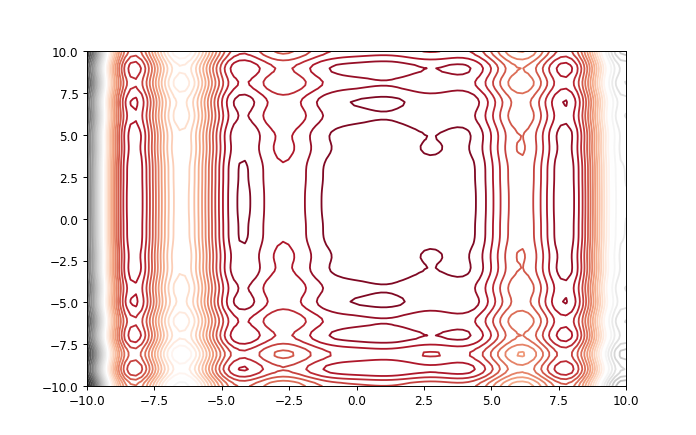

/tmp/ipykernel_872/2303138949.py:23: UserWarning:

frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.



In [148]:
import matplotlib.animation as animation

x = np.linspace(lower_limits[0], upper_limits[0], 100)
y = np.linspace(lower_limits[1], upper_limits[1], 100)

X, Y = np.meshgrid(x, y)
Z = function(np.array([X, Y]))


%matplotlib notebook
fig = plt.figure(figsize=(8,5))
plt.xlim(-10,0)
plt.ylim(-6.5,0)

def animate(i):
    p2 = fig.clear()
    plt.xlim(lower_limits[0], upper_limits[0])
    plt.ylim(lower_limits[1], upper_limits[1])
    df_posiciones_i = df_posiciones[df_posiciones["Iteration"] == i][["x_0", "x_1"]] #select data range
    p1 = plt.contour(X, Y, Z, 35, cmap='RdGy')
    p2 = plt.scatter(df_posiciones_i["x_0"], df_posiciones_i["x_1"])

ani = animation.FuncAnimation(fig, animate, repeat = True, blit = True)
